## Analysis of Healthcare Stroke Data: Over-Sampling (SMOTE)

In [1]:
# Importing Data Science Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Read the file obtained after data preparation
df_updated = pd.read_csv('Updated_train.csv')
df_updated.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes,stroke
0,3.0,0,0,95.12,18.0,0,0,0,1,0,0,0,0,1,0,0,0
1,58.0,1,0,87.96,39.2,1,1,0,1,0,1,0,0,1,0,0,0
2,8.0,0,0,110.89,17.6,0,1,1,0,0,1,0,0,1,0,0,0
3,70.0,0,0,69.04,35.9,1,0,1,0,0,1,0,1,0,0,0,0
4,14.0,0,0,161.28,19.1,0,0,0,1,0,0,0,0,1,0,0,0


In [3]:
# Defining features and target
features = df_updated.columns[:-1] # Remove 'stroke' columns
X_rfr = df_updated[features] # Features
y_rfr = df_updated['stroke'] # Target
X_rfr.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,0,1,0,0,0,0,1,0,0
1,58.0,1,0,87.96,39.2,1,1,0,1,0,1,0,0,1,0,0
2,8.0,0,0,110.89,17.6,0,1,1,0,0,1,0,0,1,0,0
3,70.0,0,0,69.04,35.9,1,0,1,0,0,1,0,1,0,0,0
4,14.0,0,0,161.28,19.1,0,0,0,1,0,0,0,0,1,0,0


### Over-Sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [4]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10, ratio='minority')
X_sm, y_sm = smote.fit_sample(X_rfr, y_rfr)

In [5]:
X_sm = pd.DataFrame(X_sm)
X_sm.columns = X_rfr.keys().tolist()
y_sm = pd.DataFrame(y_sm, columns=['stroke'])
X_sm.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,58.0,1.0,0.0,87.96,39.2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,8.0,0.0,0.0,110.89,17.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,70.0,0.0,0.0,69.04,35.9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,14.0,0.0,0.0,161.28,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
y_sm.stroke.value_counts()

1    42617
0    42617
Name: stroke, dtype: int64

### Feature Scaling: StandardScalar()

In [7]:
X=X_sm.copy()
y=y_sm.stroke

In [8]:
# Feature Scaling (Normalization): Performing z-score normalization of numerical features using StandardScaler()
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_norm = std_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = X.keys().tolist()
X_norm.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,Residence_type_encoded,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,-2.331909,-0.510850,-0.45315,-0.408124,-1.715200,-1.910329,-1.094614,-1.252291,1.252629,-0.397241,-1.243412,-0.618953,-0.598161,1.212067,-0.503118,-0.471329
1,0.130820,2.468536,-0.45315,-0.542141,1.529321,0.567522,1.083890,-1.252291,1.252629,-0.397241,0.948439,-0.618953,-0.598161,1.212067,-0.503118,-0.471329
2,-2.108024,-0.510850,-0.45315,-0.112948,-1.776417,-1.910329,1.083890,0.941315,-0.941073,-0.397241,0.948439,-0.618953,-0.598161,1.212067,-0.503118,-0.471329
3,0.668142,-0.510850,-0.45315,-0.896277,1.024278,0.567522,-1.094614,0.941315,-0.941073,-0.397241,0.948439,-0.618953,2.042240,-0.959180,-0.503118,-0.471329
4,-1.839363,-0.510850,-0.45315,0.830229,-1.546852,-1.910329,-1.094614,-1.252291,1.252629,-0.397241,-1.243412,-0.618953,-0.598161,1.212067,-0.503118,-0.471329


In [9]:
X_df = X_norm.copy()

### Train Test Split

The Train Test Split is usually done to evaluate our model by Training it on the known output (labeled data) so that the model can learn on it and Testing using unlabeled data so that the predictive accuracy of the model can be determined.

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, 
                                                    test_size=0.3, 
                                                    random_state=10) # random_state = 10 is the random seed

C:\Users\shahr\AnacondaPython3.6\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Modeling: Logistic Regression

In [11]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
# logreg = linear_model.LogisticRegression()

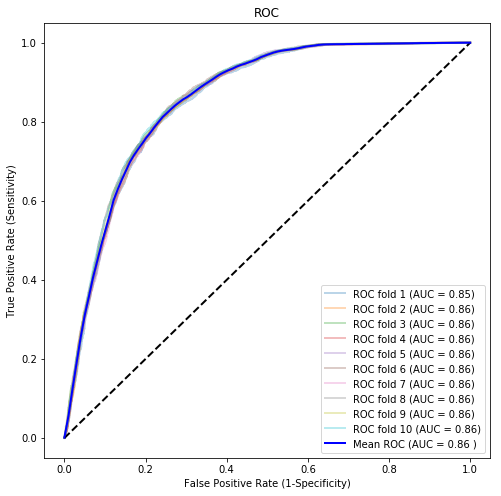

Wall time: 6.92 s


In [12]:
%%time
import matplotlib.patches as patches
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold

# Logistic Regression

clf_lr = linear_model.LogisticRegression(C=0.003, class_weight='balanced')
cv = StratifiedKFold(n_splits=10,shuffle=False)

conf_mat_lr = np.zeros((2,2)) # Initializing the Confusion Matrix

# plot arrows
fig1 = plt.figure(figsize=[8,8])
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_df,y):
#     print('{} of KFold {}'.format(i,cv.n_splits))
    xtr_lr,xvl_lr = X_df.loc[train], X_df.loc[test]
    ytr_lr,yvl_lr = y.loc[train],y.loc[test]
    
    prediction_lr = clf_lr.fit(xtr_lr,ytr_lr).predict_proba(xvl_lr)
    y_pred_lr = clf_lr.predict(xvl_lr)
    fpr_lr, tpr_lr, t_lr = roc_curve(yvl_lr, prediction_lr[:, 1]) # y_pred_lr; prediction_lr[:, 1]
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    plt.plot(fpr_lr, tpr_lr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_lr))
    i= i+1

#     print('ROC AUC score:',roc_auc_lr)
    
    # Compute confusion matrix
    cm = confusion_matrix(yvl_lr,y_pred_lr)
    conf_mat_lr = conf_mat_lr + cm
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
plt.plot(mean_fpr_lr, mean_tpr_lr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc_lr),lw=2, alpha=1)

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
print('Sum of 10 Confusion Matrices\n',conf_mat_lr)
print('AUC',aucs_lr,'\nMean AUC Score',np.mean(aucs_lr))
# Print precision, recall, f1-score and support
from sklearn.metrics import classification_report
print(classification_report(yvl_lr,clf_lr.predict(xvl_lr)))

Sum of 10 Confusion Matrices
 [[31656. 10961.]
 [ 7429. 35188.]]
AUC [0.852114415234342, 0.855813854650826, 0.8605975432273817, 0.8569185281032756, 0.8605139192378337, 0.8617480749966803, 0.8554758904165697, 0.8562343795792065, 0.8599703097374158, 0.8630988965098878] 
Mean AUC Score 0.8582485811693419
             precision    recall  f1-score   support

          0       0.81      0.75      0.78      4261
          1       0.77      0.83      0.80      4261

avg / total       0.79      0.79      0.79      8522



### Modeling: kNN

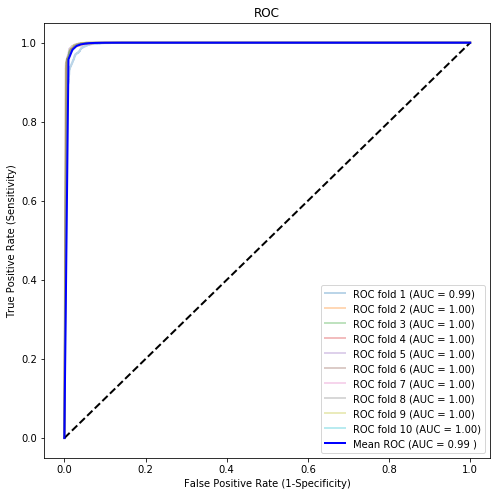

Wall time: 3min 33s


In [14]:
%%time
# kNN
clf_knn = KNeighborsClassifier(n_neighbors=10, weights='distance') 
cv = StratifiedKFold(n_splits=10,shuffle=False)

conf_mat_knn = np.zeros((2,2)) # Initializing the Confusion Matrix

# plot arrows
fig1 = plt.figure(figsize=[8,8])
tprs_knn = []
aucs_knn = []
mean_fpr_knn = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_df,y):
#     print('{} of KFold {}'.format(i,cv.n_splits))
    xtr_knn,xvl_knn = X_df.loc[train], X_df.loc[test]
    ytr_knn,yvl_knn = y.loc[train],y.loc[test]
    
    prediction_knn = clf_knn.fit(xtr_knn,ytr_knn).predict_proba(xvl_knn)
    y_pred_knn = clf_knn.predict(xvl_knn)
    fpr_knn, tpr_knn, t_knn = roc_curve(yvl_knn, prediction_knn[:, 1]) # y_pred_knn; prediction_knn[:, 1]
    tprs_knn.append(interp(mean_fpr_knn, fpr_knn, tpr_knn))
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    aucs_knn.append(roc_auc_knn)
    plt.plot(fpr_knn, tpr_knn, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_knn))
    i= i+1

#     print('ROC AUC score:',roc_auc_knn)
    
    # Compute confusion matrix
    cm = confusion_matrix(yvl_knn,y_pred_knn)
    conf_mat_knn = conf_mat_knn + cm
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_knn = np.mean(tprs_knn, axis=0)
mean_auc_knn = auc(mean_fpr_knn, mean_tpr_knn)
plt.plot(mean_fpr_knn, mean_tpr_knn, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc_knn),lw=2, alpha=1)

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [15]:
print('Sum of 10 Confusion Matrices\n',conf_mat_knn)
print('AUC',aucs_knn,'\nMean AUC Score',np.mean(aucs_knn))
# Print precision, recall, f1-score and support
from sklearn.metrics import classification_report
print(classification_report(yvl_knn,clf_knn.predict(xvl_knn)))

Sum of 10 Confusion Matrices
 [[40169.  2448.]
 [   73. 42544.]]
AUC [0.9948766956291575, 0.9965092076673784, 0.9966814103265662, 0.9961378819205045, 0.9965748021265928, 0.9967258923433896, 0.9970736007818266, 0.9977926452461955, 0.9973594029253274, 0.9952260727938528] 
Mean AUC Score 0.9964957611760792
             precision    recall  f1-score   support

          0       1.00      0.94      0.97      4261
          1       0.95      1.00      0.97      4261

avg / total       0.97      0.97      0.97      8522



### Modeling: SVM

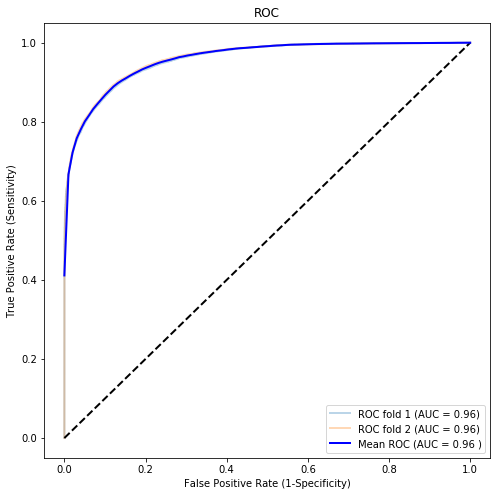

Wall time: 40min


In [16]:
%%time
clf_svc = SVC(kernel='rbf', gamma=0.001, C=10)
clf_svc.probability = True  ## Use this line only for SVM
cv = StratifiedKFold(n_splits=2,shuffle=False)

conf_mat_svc = np.zeros((2,2)) # Initializing the Confusion Matrix

# plot arrows
fig1 = plt.figure(figsize=[8,8])
tprs_svc = []
aucs_svc = []
mean_fpr_svc = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_df,y):
#     print('{} of KFold {}'.format(i,cv.n_splits))
    xtr_svc,xvl_svc = X_df.loc[train], X_df.loc[test]
    ytr_svc,yvl_svc = y.loc[train],y.loc[test]
    
    prediction_svc = clf_svc.fit(xtr_svc,ytr_svc).predict_proba(xvl_svc)
    y_pred_svc = clf_svc.predict(xvl_svc)
    fpr_svc, tpr_svc, t_svc = roc_curve(yvl_svc, prediction_svc[:, 1]) # y_pred_svc; prediction_svc[:, 1]
    tprs_svc.append(interp(mean_fpr_svc, fpr_svc, tpr_svc))
    roc_auc_svc = auc(fpr_svc, tpr_svc)
    aucs_svc.append(roc_auc_svc)
    plt.plot(fpr_svc, tpr_svc, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_svc))
    i= i+1

#     print('ROC AUC score:',roc_auc_svc)
    
    # Compute confusion matrix
    cm = confusion_matrix(yvl_svc,y_pred_svc)
    conf_mat_svc = conf_mat_svc + cm
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_svc = np.mean(tprs_svc, axis=0)
mean_auc_svc = auc(mean_fpr_svc, mean_tpr_svc)
plt.plot(mean_fpr_svc, mean_tpr_svc, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc_svc),lw=2, alpha=1)

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [17]:
print('Sum of 10 Confusion Matrices\n',conf_mat_svc)
print('AUC',aucs_svc,'\nMean AUC Score',np.mean(aucs_svc))
# Print precision, recall, f1-score and support
from sklearn.metrics import classification_report
print(classification_report(yvl_svc,clf_svc.predict(xvl_svc)))

Sum of 10 Confusion Matrices
 [[36728.  5889.]
 [ 4172. 38445.]]
AUC [0.9577503910650091, 0.9599302416586375] 
Mean AUC Score 0.9588403163618233
             precision    recall  f1-score   support

          0       0.90      0.86      0.88     21308
          1       0.87      0.91      0.89     21308

avg / total       0.88      0.88      0.88     42616



### Merging results of classfiers in one ROC graph

Text(0.63,0.4,'Less Accurate Area')

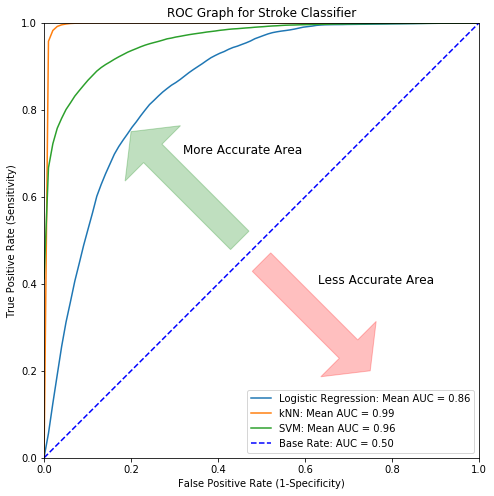

In [18]:
#PLotting ROC Curves for all classifiers
fig1 = plt.figure(figsize=(8,8))

ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.25))
ax1.add_patch(patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.25))

plt.title('ROC Graph for Stroke Classifier')
plt.plot(mean_fpr_lr, mean_tpr_lr, label='Logistic Regression: Mean AUC = %0.2f' % (mean_auc_lr))
plt.plot(mean_fpr_knn, mean_tpr_knn, label='kNN: Mean AUC = %0.2f' % (mean_auc_knn))
plt.plot(mean_fpr_svc, mean_tpr_svc, label='SVM: Mean AUC = %0.2f' % (mean_auc_svc)) # lw=2, alpha=1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0,1],[0,1],'b--', label='Base Rate: AUC = 0.50') # Plot Base Rate ROC
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')

plt.text(0.32,0.7,'More Accurate Area',fontsize = 12)
plt.text(0.63,0.4,'Less Accurate Area',fontsize = 12)

# plt.grid(True)